In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from os.path import expanduser

In [2]:
df = pd.read_csv(expanduser('~/data/jstor/stats/np_stats.csv.gz'), index_col=0)

/Users/belikov/anaconda/envs/aa/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.shape

(1684658, 11)

In [4]:
df.head()

,np,doi,root,n_words,n_phrases,np_first_occ,root_first_occ,np_count.table,np_count.and_ig_ig,np_count.andnot_and_ig,np_count.andnot_andnot_and
0,"('business',)",10.1525/sop.2004.47.2.189,business,14374,683,0.134615,0.134615,0.0,2.0,0.0,4.0
1,"('table',)",10.1525/sop.2004.47.2.189,table,14374,683,0.165680,0.134615,0.0,2.0,0.0,0.0
2,"('respondent',)",10.1525/sop.2004.47.2.189,respondent,14374,683,0.029586,0.029586,1.0,2.0,2.0,37.0
3,"('majority',)",10.1525/sop.2004.47.2.189,majority,14374,683,0.031065,0.031065,0.0,1.0,0.0,9.0
4,"('man',)",10.1525/sop.2004.47.2.189,man,14374,683,0.062130,0.062130,0.0,1.0,0.0,43.0


In [5]:
nps = df.np.unique()

In [6]:
nps.shape

(540094,)

In [7]:
roots = df.root.unique()

In [8]:
roots.shape

(29198,)

In [11]:
# number of papers without candidates; number of papers
sum(df['np'].isnull()), len(df['doi'].unique())

(1256, 5694)

In [12]:
df.loc[df['np'].isnull(), 'doi'].to_csv(expanduser('~/data/jstor/stats/empty_papers.csv'))

In [13]:
x = df['np_count.table']
y = df['np_count.and_ig_ig']

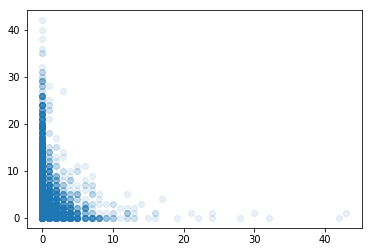

In [14]:
plt.scatter(x, y, alpha=0.1)

In [15]:
mask_null = df['np'].isnull()
df2 = df.loc[~mask_null]

In [16]:
df2['np'] = df2['np'].apply(lambda x: literal_eval(x))

/Users/belikov/anaconda/envs/aa/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
mask_long = df2['np'].apply(lambda x: len(list(x)) > 1)
sum(mask_long)

1021494

In [18]:
df3 = df2.loc[mask_long]

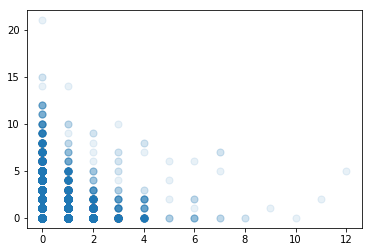

In [19]:
x = df3['np_count.table']
y = df3['np_count.and_ig_ig']
plt.scatter(x, y, alpha=0.1, s=50)

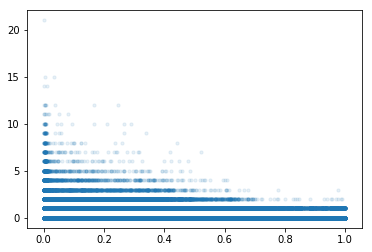

In [20]:
x = df3['np_first_occ']
y = df3['np_count.and_ig_ig']
plt.scatter(x, y, alpha=0.1, s=10)